In [1]:
from symbolic import symbolic
from experiment.synthetic_experiments import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.nn import functional as F
import re

%matplotlib inline 
%load_ext autoreload
%autoreload 2

In [2]:
experiment = FullyKnownConstraintsSyntheticExperiment(size_of_train_set=1000, checkpoint_dir="../runs", learning_rate=.01)
train_loader, valid_loader, test_loader = experiment.get_loaders()

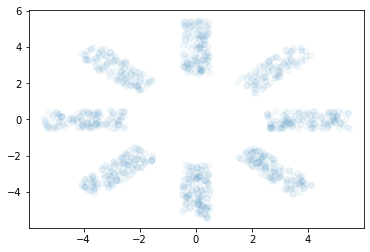

In [3]:
samps = []
for i, data in enumerate(train_loader):

    samples = data[0]
    labels = data[1]
    
    samps.append(samples)

plt.scatter(*torch.cat(samps, dim=0).numpy().T, alpha=.05)

Run the following commands from terminal first:

```
run_synthetic_data_experiments.py synthetic_full --learning_rate=1e-2 --baseline=False --size_of_train_set=10 --epochs=50 run
run_synthetic_data_experiments.py synthetic_full --learning_rate=1e-2 --baseline=False --size_of_train_set=100 --epochs=50 run
run_synthetic_data_experiments.py synthetic_full --learning_rate=1e-2 --baseline=False --size_of_train_set=1000 --epochs=50 run
run_synthetic_data_experiments.py synthetic_full --learning_rate=1e-2 --baseline=False --size_of_train_set=10000 --epochs=50 run

run_synthetic_data_experiments.py synthetic_full --learning_rate=1e-2 --baseline=True --size_of_train_set=10 --epochs=50 run
run_synthetic_data_experiments.py synthetic_full --learning_rate=1e-2 --baseline=True --size_of_train_set=100 --epochs=50 run
run_synthetic_data_experiments.py synthetic_full --learning_rate=1e-2 --baseline=True --size_of_train_set=1000 --epochs=50 run
run_synthetic_data_experiments.py synthetic_full --learning_rate=1e-2 --baseline=True --size_of_train_set=10000 --epochs=50 run
```

# Compare the Loss Curves and the Constraint Accuracy

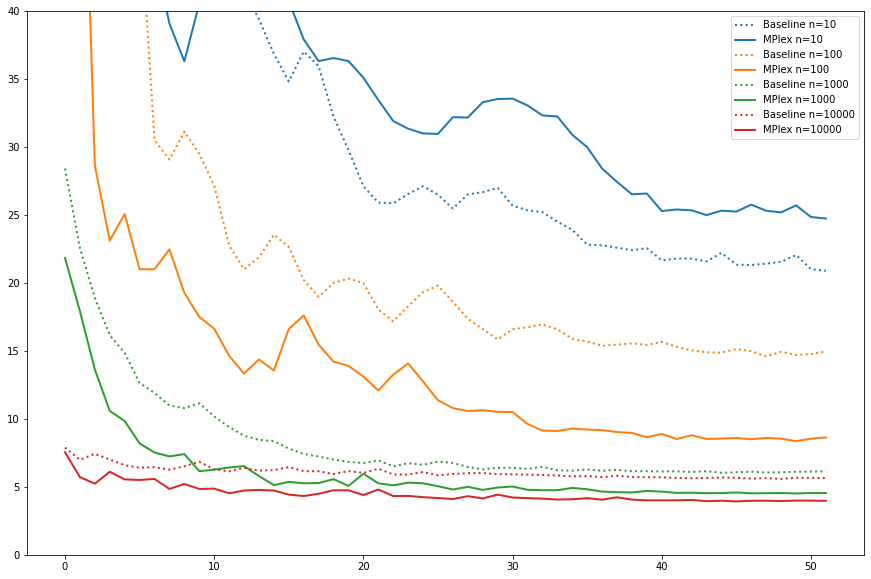

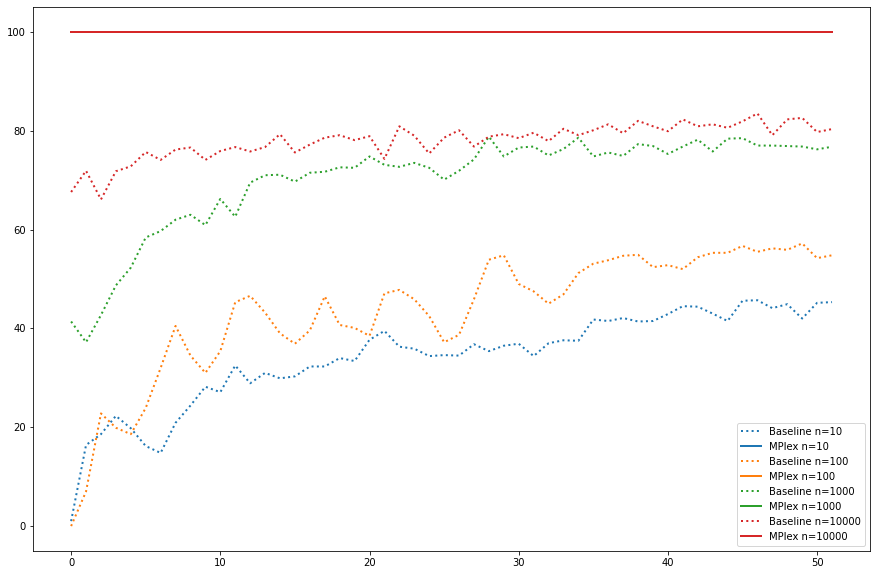

In [4]:
def parse_log_to_constraint_and_loss(infile):
    
    test_loss = []
    test_constraint = []
    
    for line in infile.readlines():
        if "Test" in line:
            [(loss, constraint)] = re.findall(r'.*Loss (\d+.\d+).*Constraint (\d+.\d+).*', line)
            test_loss.append(float(loss))
            test_constraint.append(float(constraint))
    return test_loss, test_constraint
           
loss_baseline, loss_sloss = [], []
constraint_baseline, constraint_sloss = [], []
train_sizes = [10, 100, 1000, 10000]

for dset_size in train_sizes:
    with open(f"../runs/SyntheticFull-0.01_12_True_{dset_size}/logs/logs.txt", "r") as f:
        lb_, cb_ = parse_log_to_constraint_and_loss(f)
        loss_baseline.append(lb_)
        constraint_baseline.append(cb_)
        
    with open(f"../runs/SyntheticFull-0.01_12_False_{dset_size}/logs/logs.txt", "r") as f:
        ls_, cs_ = parse_log_to_constraint_and_loss(f)
        loss_sloss.append(ls_)
        constraint_sloss.append(cs_)
        

fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
c = ["C0", "C1", "C2", "C3"]

for i, v in enumerate(train_sizes):
    ax.plot(loss_baseline[i], label=f"Baseline n={v}", c=f"C{i}", ls=":", lw=2)
    ax.plot(loss_sloss[i], label=f"MPlex n={v}", c=f"C{i}", ls="-", lw=2)
plt.legend(loc="best")
plt.ylim([0, 40])
plt.show()


fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
for i, v in enumerate(train_sizes):
    ax.plot(constraint_baseline[i], label=f"Baseline n={v}", c=f"C{i}", ls=":", lw=2)
    ax.plot(constraint_sloss[i], label=f"MPlex n={v}", c=f"C{i}", ls="-", lw=2)
plt.legend(loc="best")
plt.show()

# Compare Samples from the Model

In [5]:
from IPython.display import Image

for use_baseline in [True, False]:
    for size_of_train_set in [10, 100, 1000, 10000]:
        experiment = FullyKnownConstraintsSyntheticExperiment(
            size_of_train_set=size_of_train_set,
            checkpoint_dir="../runs",
            learning_rate=.01,
            baseline=use_baseline
        )
        model = experiment.load_model()
        experiment.plot_validation_reconstructions(-1, model, test_loader)
        print(experiment.figures_directory)

../runs/SyntheticFull-0.01_12_True_10/figures
../runs/SyntheticFull-0.01_12_True_100/figures
../runs/SyntheticFull-0.01_12_True_1000/figures
../runs/SyntheticFull-0.01_12_True_10000/figures
../runs/SyntheticFull-0.01_12_False_10/figures
../runs/SyntheticFull-0.01_12_False_100/figures
../runs/SyntheticFull-0.01_12_False_1000/figures
../runs/SyntheticFull-0.01_12_False_10000/figures


# n = 10

### Baseline

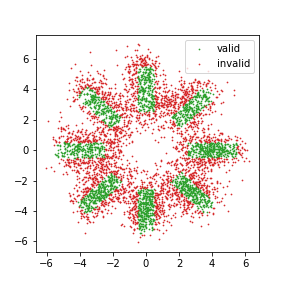

In [6]:
Image("../runs/SyntheticFull-0.01_12_True_10/figures/-1_reconstruction.png")

### MPlexNet

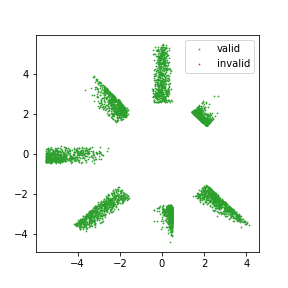

In [7]:
Image("../runs/SyntheticFull-0.01_12_False_10/figures/-1_reconstruction.png")

---

# n = 100
### Baseline

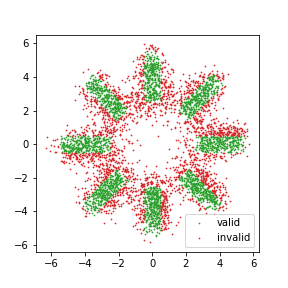

In [8]:
Image("../runs/SyntheticFull-0.01_12_True_100/figures/-1_reconstruction.png")

### MPlexNet

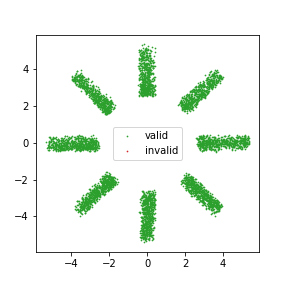

In [9]:
Image("../runs/SyntheticFull-0.01_12_False_100/figures/-1_reconstruction.png")

---

# n = 1000
### Baseline

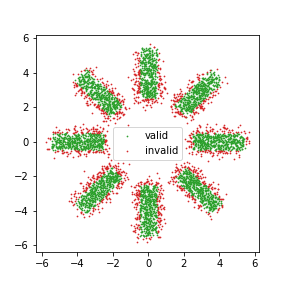

In [10]:
Image("../runs/SyntheticFull-0.01_12_True_1000/figures/-1_reconstruction.png")

### MPlexNet

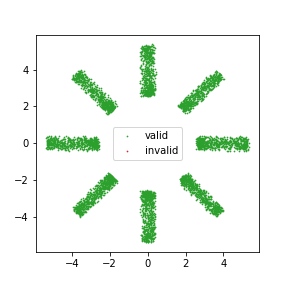

In [11]:
Image("../runs/SyntheticFull-0.01_12_False_1000/figures/-1_reconstruction.png")

---

# n = 10000
### Baseline

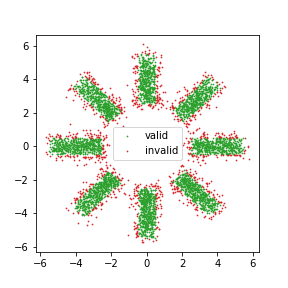

In [12]:
Image("../runs/SyntheticFull-0.01_12_True_10000/figures/-1_reconstruction.png")

### MPlexNet

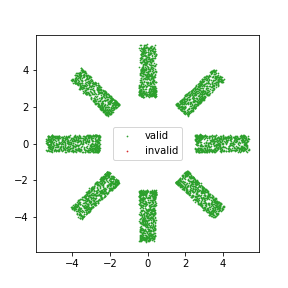

In [13]:
Image("../runs/SyntheticFull-0.01_12_False_10000/figures/-1_reconstruction.png")

---